# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform


def sample_normal(sample_size=10, mu=0, std=1):
  #TODO#1.1:
  return norm.rvs(mu, std, size=sample_size)
  
def sample_bernoulli(sample_size=10, p=0.3):
  #TODO#1.2:
  return bernoulli.rvs(p,  size=sample_size)

def sample_binomial(sample_size=10, n=10, p=0.3):
  #TODO#1.3:
  return binom.rvs(n, p,  size=sample_size)

def sample_multinomial(sample_size=10, n=10, p=[0.3, 0.2, 0.5]):
  #TODO#1.4:
  return multinomial.rvs(n, p, size=sample_size)

def sample_uniform(sample_size=10, from_x=0, to_x=1):
  #TODO#1.5:
  return uniform.rvs(from_x, to_x - from_x, size=sample_size)

def sample_triangle(sample_size=10, a=0, b=1):
  #TODO#1.6:
  mid = (a + b) / 2
  return np.random.triangular(a, mid, b, size=sample_size)

Normal


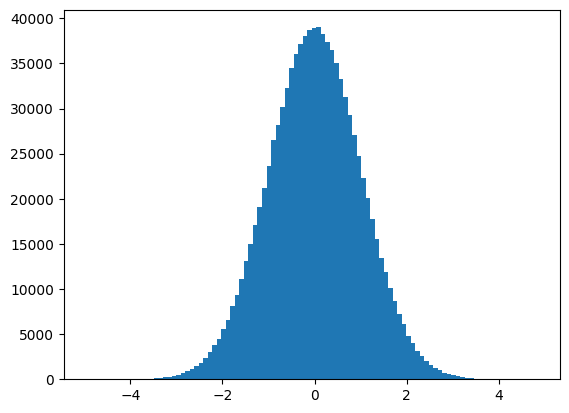

Bernoulli


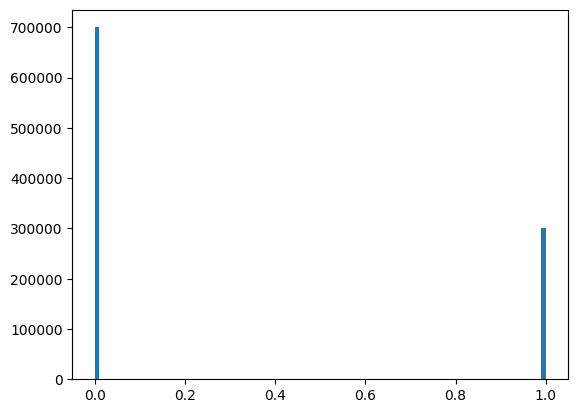

Binomial


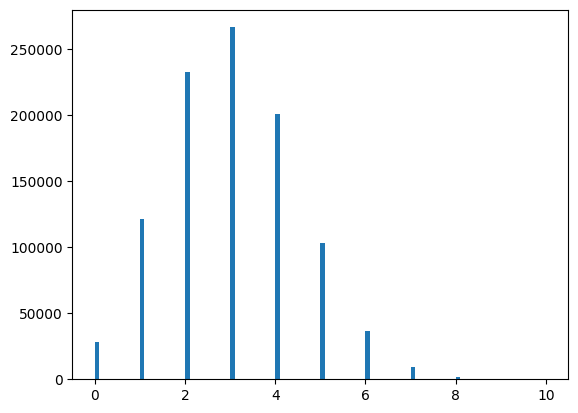

Multinomial


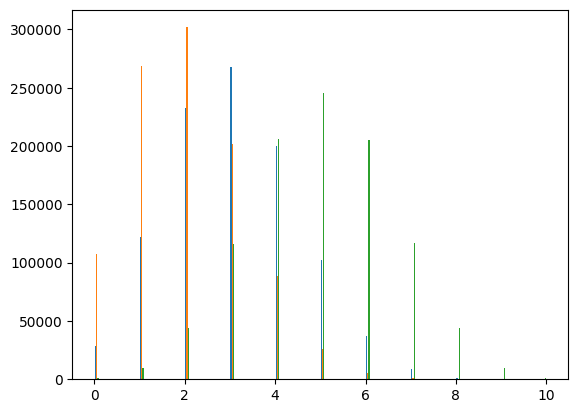

Uniform


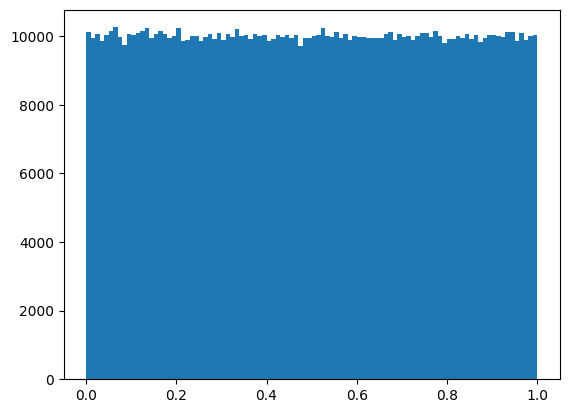

Triangle


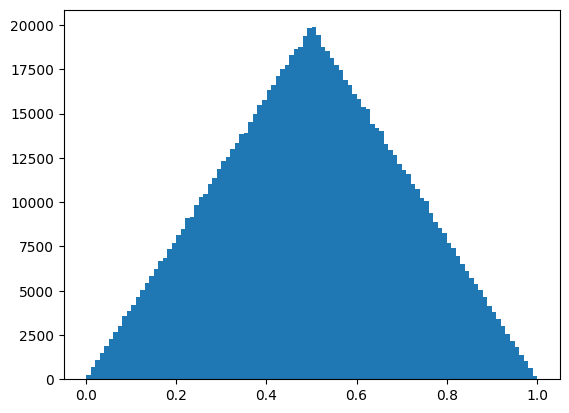

In [177]:
# Use this code block to show your sampling result.
sample_size = 1000000

s = sample_normal(sample_size)
print("Normal")
plt.hist(s, 100, density=False)
plt.show()

s = sample_bernoulli(sample_size)
print("Bernoulli")
plt.hist(s, 100, density=False)
plt.show()

s = sample_binomial(sample_size)
print("Binomial")
plt.hist(s, 100, density=False)
plt.show()

s = sample_multinomial(sample_size)
print("Multinomial")
plt.hist(s, 100, density=False)
plt.show()

s = sample_uniform(sample_size)
print("Uniform")
plt.hist(s, 100, density=False)
plt.show()

s = sample_triangle(sample_size)
print("Triangle")
plt.hist(s, 100, density=False)
plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

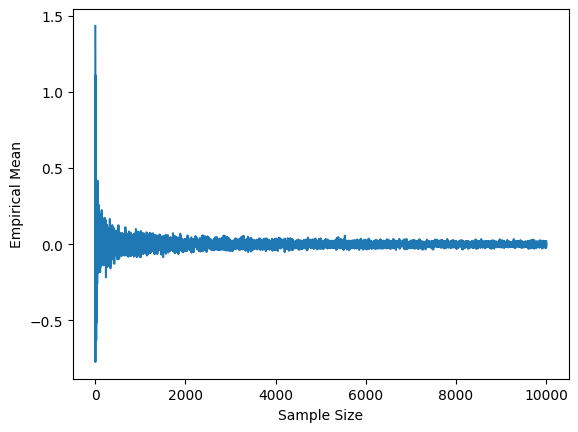

In [178]:
x = np.arange(1,10001,1)
empirical_means = []

for sample_size in x:
    samples = sample_normal(sample_size, 0, 1)
    empirical_mean = np.mean(samples)
    empirical_means.append(empirical_mean)

plt.plot(x, empirical_means)
plt.xlabel("Sample Size")
plt.ylabel("Empirical Mean")
plt.show()


- For small sample sizes, the empirical mean very fluctuates, as random samples might deviate from the population mean.
- As the sample size get bigger, the empirical mean converges to theoretical mean (0 for N(0,1)).
- This behavior is consistent with the Law of Large Numbers, which implies that with a large enough sample size, the empirical mean will converges to the theoretical mean.

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

500:

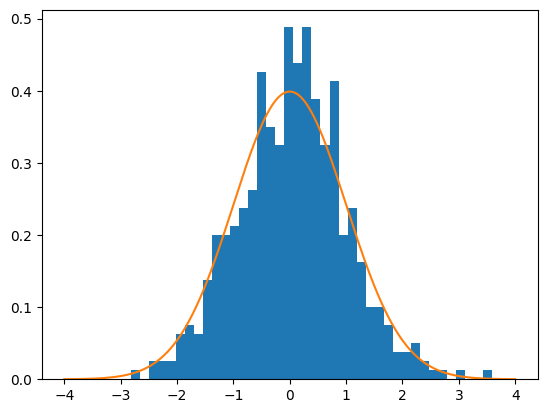

1000:

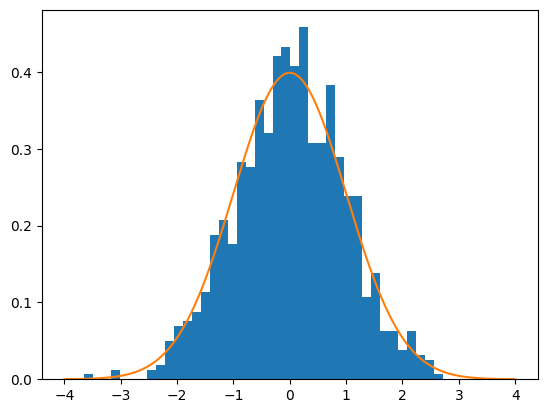

5000:

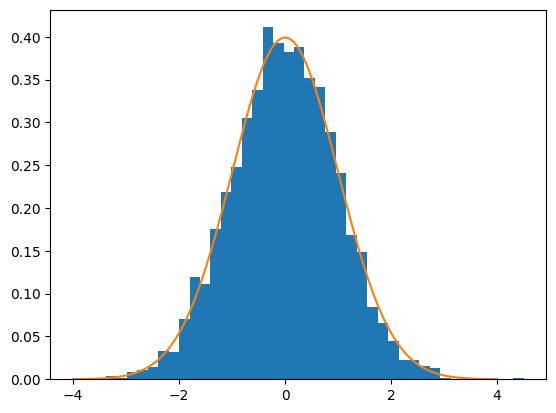

10000:

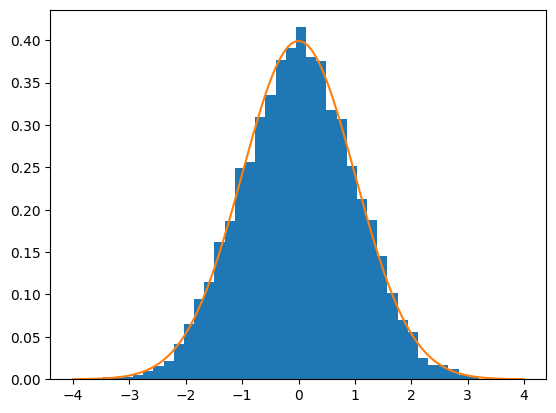

In [179]:
sample_sizes = [500,1000,5000,10000]

for sample_s in sample_sizes:
    print(sample_s,end=":")
    s = sample_normal(sample_s)
    x = np.arange(-4,4,0.001)
    plt.hist(s, bins=40, density=True)
    plt.plot(x,norm.pdf(x,0,1))
    plt.show()


As the sample size increases, the histogram provides a better approximation of the true PDF of the normal distribution

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

4


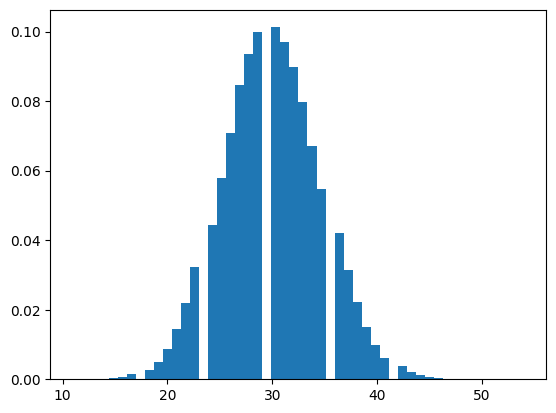

In [180]:
print(4)
s = np.random.binomial(100,0.3,1000000)
a,b,c=plt.hist(s,50,density=True)
mu = 0.3 * 100
std = np.sqrt(100*0.3*0.7)
plt.show()

In [181]:
print(5)
sum = 0
for i in range(len(b)-1):
    if(b[i]>=40):
        sum+=a[i]
print(sum)

5
0.014422093023255823


In [182]:
import scipy.stats as stats

n = 100
p = 0.3

binom_prob = 1 - stats.binom.cdf(40, n, p)
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5
X = 40
Z = (X - mu) / sigma
clt_prob = 1 - stats.norm.cdf(Z)
print("Difference:", {abs(binom_prob - clt_prob)})

Difference: {np.float64(0.0020497587041878873)}


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

![alt text](7.jpg)

# Correlation

The correlation captures the linear relationship between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

![alt text](8_9.jpg)

# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

![alt text](10_1_3.jpg)
![alt text](10_4.jpg)

In [183]:
def f(n,p):
    return ((1-p**n)**10000) + 10000*((1-p**n)**9999)*p**n

def check(p):
    i=0
    while(f(i,p)<=0.9999):
        i+=1
    return i        

print(10.3,check(0.0011437))
print(10.4,check(0.0359205))


10.3 2
10.4 5


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
  
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

11.1)Ans (a,b) , (b,c) , (b,d)

In [184]:
import numpy as np

mu = np.array([1.003, 1.002, 1.004, 1.004])
sigma = np.array([[10e-3, 0, 4e-3, 5e-3], 
                  [0, 3e-3, 0, 0], 
                  [4e-3, 0, 12e-3, 2e-3], 
                  [5e-3, 0, 2e-3, 15e-3]])

def simulate_prices(days, mu, sigma, start_price=10, n_simulations=10000):
    n_coins = len(mu)
    prices = np.zeros((n_simulations, n_coins, days + 1))
    prices[:, :, 0] = start_price

    for t in range(1, days + 1):
        rates = np.random.multivariate_normal(mu, sigma, n_simulations)
        prices[:, :, t] = prices[:, :, t - 1] * rates
    return prices

def probability_of_profit(returns):
    return np.mean(returns > 0, axis=0)

def calculate_return(prices):
    return prices[:, :, -1] - prices[:, :, 0]

prices_30 = simulate_prices(30, mu, sigma)
prices_180 = simulate_prices(180, mu, sigma)

returns_30 = calculate_return(prices_30)
returns_180 = calculate_return(prices_180)

prob_profit_30 = probability_of_profit(returns_30)
prob_profit_180 = probability_of_profit(returns_180)

expected_return_30 = np.mean(returns_30, axis=0)
expected_return_180 = np.mean(returns_180, axis=0)

variance_return_30 = np.var(returns_30, axis=0)
variance_return_180 = np.var(returns_180, axis=0)

print("11.2&11.3) Ans")
print("30Days :")
print("Prob_profit :",prob_profit_30)
print("return :",expected_return_30)
print("var :",variance_return_30)
print("180Days :")
print("Prob_profit :",prob_profit_180)
print("return :",expected_return_180)
print("var :",variance_return_180)

print("\ncoin B has the highest probability of having profit")

11.2&11.3) Ans
30Days :
Prob_profit : [0.4494 0.53   0.457  0.4329]
return : [0.85258848 0.67493396 1.21143786 1.13961317]
var : [41.02619795 11.04500793 54.0447748  68.34533035]
180Days :
Prob_profit : [0.3947 0.5422 0.4015 0.344 ]
return : [ 7.66607667  4.14854743 10.72239392 10.01491131]
var : [1784.60913216  140.38770264 2963.69744795 3159.6130076 ]

coin B has the highest probability of having profit


11.4)Ans : It is possible to have a positive expected return while having around 50% chance of profitability because the expected return is controlled by large positive returns that may occur in a small number of simulations. Even though 50% of the outcomes may result in a loss, the few very high returns may skew the average up to be positive.

11.5
## 30 Days

| Strategy | Buy \( a \) | Buy \( b \) | Buy \( c \) | Buy \( d \) | Expected Return | Variance | Probability of Profit |
|----------|-------------|-------------|-------------|-------------|-----------------|----------|-----------------------|
| 1        | 100%        | 0%          | 0%          | 0%          | mu_a(30) | sigma^2_a(30) |  P({profit}_a) |
| 2        | 0%          | 100%        | 0%          | 0%          | mu_b(30) | sigma^2_b(30) |  P({profit}_b) |
| 3        | 0%          | 0%          | 100%        | 0%          | mu_c(30) | sigma^2_c(30) |  P({profit}_c) |
| 4        | 0%          | 0%          | 0%          | 100%        | mu_d(30) | sigma^2_d(30) |  P({profit}_d) |
| 5        | 50%         | 50%         | 0%          | 0%          | Avg of \( a,b \) | Combined var | Combined prob |
| 6        | 50%         | 0%          | 50%         | 0%          | Avg of \( a,c \) | Combined var | Combined prob |
| 7        | 50%         | 0%          | 0%          | 50%         | Avg of \( a,d \) | Combined var | Combined prob |

## 180 Days

| Strategy | Buy \( a \) | Buy \( b \) | Buy \( c \) | Buy \( d \) | Expected Return | Variance | Probability of Profit |
|----------|-------------|-------------|-------------|-------------|-----------------|----------|-----------------------|
| 1        | 100%        | 0%          | 0%          | 0%          | mu_a(180) | sigma^2_a(180) |  P({profit}_a) |
| 2        | 0%          | 100%        | 0%          | 0%          | mu_b(180) | sigma^2_b(180) |  P({profit}_b) |
| 3        | 0%          | 0%          | 100%        | 0%          | mu_c(180) | sigma^2_c(180) |  P({profit}_c) |
| 4        | 0%          | 0%          | 0%          | 100%        | mu_d(180) | sigma^2_d(180) |  P({profit}_d) |
| 5        | 50%         | 50%         | 0%          | 0%          | Avg of \( a,b \) | Combined var | Combined prob |
| 6        | 50%         | 0%          | 50%         | 0%          | Avg of \( a,c \) | Combined var | Combined prob |
| 7        | 50%         | 0%          | 0%          | 50%         | Avg of \( a,d \) | Combined var | Combined prob |


In [185]:
strategies = {
    1: [1, 0, 0, 0],
    2: [0, 1, 0, 0],
    3: [0, 0, 1, 0],
    4: [0, 0, 0, 1],
    5: [0.5, 0.5, 0, 0],
    6: [0.5, 0, 0.5, 0],
    7: [0.5, 0, 0, 0.5],
}

def simulate_strategy_return(strategy, returns):
    return np.dot(returns, strategy)

def strategy_stats(returns, strategies):
    expected_return = {}
    variance = {}
    prob_profit = {}
    
    for s, allocation in strategies.items():
        strat_returns = simulate_strategy_return(allocation, returns)
        expected_return[s] = np.mean(strat_returns)
        variance[s] = np.var(strat_returns)
        prob_profit[s] = np.mean(strat_returns > 0)
    
    return expected_return, variance, prob_profit

expected_return_30, variance_30, prob_profit_30 = strategy_stats(returns_30, strategies)
expected_return_180, variance_180, prob_profit_180 = strategy_stats(returns_180, strategies)


print(11.6)
print("return")
print("30Days :")
for i in expected_return_30:
    print(i,":",expected_return_30[i])
print("180Days :")
for i in expected_return_180:
    print(i,":",expected_return_180[i])

print("\nThe highest expected return comes is Strategy 3 or 4 depend on your luck(rgn in simulation)")

11.6
return
30Days :
1 : 0.8525884759668408
2 : 0.6749339632030752
3 : 1.2114378632851734
4 : 1.1396131675419703
5 : 0.763761219584958
6 : 1.0320131696260073
7 : 0.9961008217544055
180Days :
1 : 7.666076670719848
2 : 4.148547426266492
3 : 10.722393916735559
4 : 10.014911313619876
5 : 5.90731204849317
6 : 9.194235293727704
7 : 8.840493992169861

The highest expected return comes is Strategy 3 or 4 depend on your luck(rgn in simulation)


In [186]:
print(11.7)
print("variance")
print("30Days :")
for i in variance_30:
    print(i,":",variance_30[i])
print("180Days :")
for i in variance_180:
    print(i,":",variance_180[i])

print("\nThe safest strategy is the Strategy with the lowest variance(Strategy2)")

11.7
variance
30Days :
1 : 41.026197947087354
2 : 11.045007934121706
3 : 54.04477479602944
4 : 68.34533034964943
5 : 12.928219596871967
6 : 31.33383833028418
7 : 36.975782236139665
180Days :
1 : 1784.6091321645386
2 : 140.38770263593017
3 : 2963.6974479530063
4 : 3159.6130075962296
5 : 481.86805117434625
6 : 1396.9826194306743
7 : 1492.099456859876

The safest strategy is the Strategy with the lowest variance(Strategy2)


11.8)Ans Strategies 6 and 7 have 50% investments in (a), but Strategy 6 includes coin (c), and Strategy 7 includes coin (d).

11.9)Ans 
1. Diversify Investments : Avoid putting all capital into one asset or sector
2. Consider Time Horizon and Risk Tolerance : Define a time horizon for each investment. For shorter horizons (less than five years), prioritize lower-risk investments
3. Regularly Rebalance Portfolio : Rebalance the portfolio at least once a year to maintain the target asset allocation, especially after significant market changes.
4. Prioritize Low-Cost Investments : Favor low-fee investments, such as index funds or ETFs, to reduce the impact of fees on long-term returns.
5. Stay Invested and Avoid Market Timing : Avoid the temptation to “time” the market by frequently buying and selling based on short-term price movements. Instead, stay invested and contribute regularly